# Analyzing COVID-19 Data Using Python

### Felix Counihan

### IA 241: Dr. Wei

# Data Source

In [1]:
%matplotlib inline

In [2]:
import pandas

# Importing Data from S3 Bucket

In [3]:
df = pandas.read_excel('s3://counihan-ia241/COVID-19-geographic-disbtribution-worldwide-2020-05-01.xlsx')

# 1. Calculating 10 Highest Overall Rates of Infection

In [4]:
sum_death_country = df.groupby('countriesAndTerritories').sum()['deaths']
death_rate_pop = sum_death_country/df.groupby('countriesAndTerritories').sum()['popData2018']
death_rate_pop.nlargest(10)

countriesAndTerritories
Cases_on_an_international_conveyance_Japan    0.000036
Andorra                                       0.000011
San_Marino                                    0.000010
Sint_Maarten                                  0.000008
Isle_of_Man                                   0.000006
Belgium                                       0.000005
Jersey                                        0.000005
Guernsey                                      0.000005
Spain                                         0.000004
Montserrat                                    0.000004
dtype: float64

# 2. Calculate 20 Highest Death Rates

In [5]:
death_per_country = df.groupby('countriesAndTerritories').sum()['deaths']
death_rate_case = sum_death_country/df.groupby('countriesAndTerritories').sum()['cases']
death_rate_case.nlargest(20)

countriesAndTerritories
Yemen                       0.333333
Nicaragua                   0.285714
France                      0.188114
Sint_Maarten                0.171053
British_Virgin_Islands      0.166667
Belgium                     0.156516
United_Kingdom              0.156324
Northern_Mariana_Islands    0.142857
Italy                       0.136117
Bahamas                     0.135802
Antigua_and_Barbuda         0.125000
Mauritania                  0.125000
Sweden                      0.122606
Netherlands                 0.121961
Spain                       0.114991
Liberia                     0.113475
Hungary                     0.112819
Algeria                     0.112332
Belize                      0.111111
Guyana                      0.109756
dtype: float64

# 3. Graph of 20 Highest Death Rates

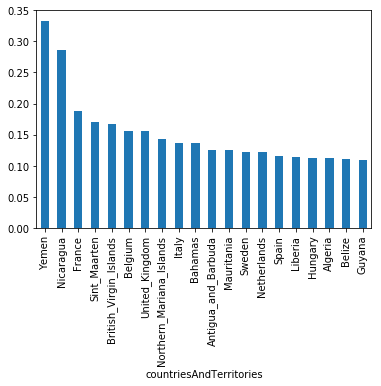

In [6]:
death_rate_case.nlargest(20).plot.bar()

# 4. Select USA Data

In [7]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']

# 4.1 Calculate Days With Most Deaths in USA

In [8]:
usa_data_plot = df.groupby('dateRep').sum()['deaths']
usa_data_plot.nlargest(10)

dateRep
2020-04-16    10520
2020-04-17     8709
2020-04-18     8568
2020-04-08     7663
2020-04-15     7604
2020-04-10     7445
2020-04-24     7444
2020-04-22     7284
2020-04-11     7221
2020-04-04     6633
Name: deaths, dtype: int64

# 5. Visualizing Death Rates in USA vs Italy

### USA: cases vs deaths

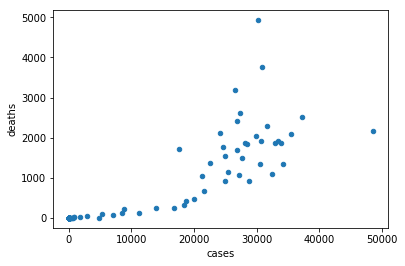

In [9]:
usa_data.plot.scatter(x = 'cases',y = 'deaths')

### Italy: cases vs deaths

In [10]:
ita_data = df.loc[df['countriesAndTerritories'] == 'Italy']

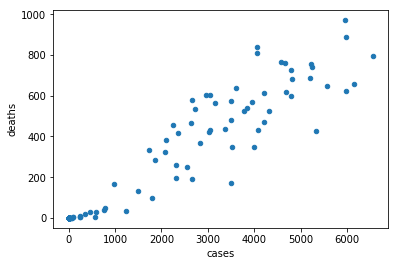

In [11]:
ita_data.plot.scatter(x = 'cases',y = 'deaths')

# 5.1

The COVID-19 virus is a rapidly spreading virus that spreads through human contact. The number of cases and deaths are largely a result of every country's management of the virus. In this notebook, we calculate and graph the death rates of different countries, and look at the data from the United States.

# 5.2

The data is from the European Centre for Disease Prevention and Control, a European Union agency, and is up to date as of May 1, 2020. The data was downloaded as an XLSX file and imported to the S3 bucket to read in python.

# 5.3

We calculated the amount of deaths per total population to see which countries have the highest overall rates of infection. To analyze the severity in each country, we calculated the 20 highest death rates by dividing the total amount of cases by the total amount of deaths in each country. We also calculated the days with the most deaths in the United States by grouping by day and taking the 10 highest death numbers for each day, and ranking the highest 10.

# 5.4

The first graph plots the 20 countries with the highest death rates. While smaller countries such as Sint Maarten, the British Virgin Islands, and Northern Mariana Islands appear high on the list, these countries have significantly smaller populations than France and Italy, who also rank high on the list, a sign of widepsread infection in those countries.

The second and third graphs compare the death rates from the United States and Italy. The trend of the United States graph has an exponential shape, compared to Italy and a more linear shape. We can conclude that the United States needs to take action to slow down the curve and prevent the virus from spreading rapidly and exponentially.

# 5.5

The Eurpoean Centre for Disease Prevention and Control (ECDC) is an IGO agency funded by the European Union (EU). The core function of the ECDC is to strengthen the protection of countries in the EU from communicable diseases, such as COVID-19.

# 5.6

Limitations in this notebook stem from the difference in population of each country. Smaller countries have a higher chance of appearing higher on the list of overall rates of infection, as their denominators for this calcuation are much smaller. Because of this, dividing deaths by the number of cases to calculate the death rate is more representative of widespread infection. Furthermore, in the second and third graphs the x axis values for the United States are much larger, we must take into account that the United States has a significantly larger population than Italy. Because of this, making a visual representation gives us a better idea of rates of infection. To improve the project, drawing a line of best fit on the second and third graphs would give us a better representation of actual trend of the severity in each country. 

# 5.7

The second and third visualizations display the severity of the virus here in the United States. The trend of death rates in the United States shows that the virus will spread exponentially, compared to the more linear fashion in Italy. While we must take into account the population differences that may skew our data, it appears that if legislative action and other preventative measures are not taken, the siutation in the United States has the potential to become much worse in the future.